In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import os
import scipy.io as sc
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers.experimental import preprocessing
import time
from IPython.display import clear_output
import math 

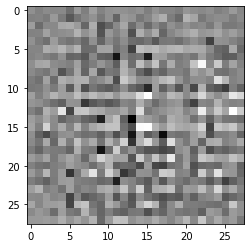

In [8]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256) # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [9]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[0.00063982]], shape=(1, 1), dtype=float32)


In [10]:
def make_generator(blockSize):
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(16, (1, 2), strides=(1, 2), activation="linear",
                            input_shape=(blockSize, 2, 1)))
    model.add(layers.Conv2D(32, (1, 16), activation="linear", padding='same'))
    model.add(layers.Conv2D(16, (1, 32), activation="linear", padding='same'))
    model.add(layers.Reshape((blockSize, 16, 1)))
    model.add(layers.AveragePooling2D((1, 8)))
    model.add(layers.Dense(1))
    return model

def make_discriminator_model(blockSize):
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (2, 1), strides=(1, 1), padding='same',
                            input_shape=[blockSize, 2, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))
    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))
    model.add(layers.Flatten())
    model.add(layers.Dense(1))
    return model

g_noise = tf.random.normal([1, 50, 2, 1])
generator = make_generator(50)
test = generator(g_noise)
print(test.shape)


(1, 50, 2, 1)


In [14]:
discrminator = make_discriminator_model(50)
decision = discrminator(test)
print(decision)

tf.Tensor([[0.00025338]], shape=(1, 1), dtype=float32)


In [7]:
test = make_discriminator_model(50)
test.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 50, 2, 64)         192       
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 50, 2, 64)         0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 50, 2, 64)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 25, 1, 128)        204928    
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 25, 1, 128)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 25, 1, 128)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3200)             

In [3]:
import math 
cons_4 = np.dot(np.sqrt(0.5),[complex(i,j)for i in c_4 for j in c_4])
cons_16 = np.array([complex(i,j)for j in c_16 for i in c_16r])
cons_16 = cons_16/np.sqrt(np.mean(np.abs(cons_16)**2))
print(cons_4,"\n",cons_16)

[ 0.70710678+0.70710678j  0.70710678-0.70710678j -0.70710678+0.70710678j
 -0.70710678-0.70710678j] 
 [-0.9486833 +0.9486833j  -0.31622777+0.9486833j   0.31622777+0.9486833j
  0.9486833 +0.9486833j  -0.9486833 +0.31622777j -0.31622777+0.31622777j
  0.31622777+0.31622777j  0.9486833 +0.31622777j -0.9486833 -0.31622777j
 -0.31622777-0.31622777j  0.31622777-0.31622777j  0.9486833 -0.31622777j
 -0.9486833 -0.9486833j  -0.31622777-0.9486833j   0.31622777-0.9486833j
  0.9486833 -0.9486833j ]


In [68]:
def dataset(dataFile, labelFile):
    dataFile = "./communication/" + dataFile
    labelFile = "./communication/" + labelFile
    my_data = sc.loadmat(dataFile)
    my_labels = sc.loadmat(labelFile)
    my_data = my_data['Y']
    X = my_labels['L_S_x']
    myOrig = table_data(my_data, my_labels['L_Constellations'][0], X)
    mytable = assign_label(myOrig)
    return mytable


def assign_label(data):
    c_4 = [1,-1]
    c_16 = [3,1,-1,-3]
    c_16r = [-3,-1,1,3]
    cons_4 = np.dot(np.sqrt(0.5),[complex(i,j)for i in c_4 for j in c_4])
    cons_16 = np.array([complex(i,j)for j in c_16 for i in c_16r])
    cons_16 = cons_16/np.sqrt(np.mean(np.abs(cons_16)**2))
    cons4 = data[data.cons==1]
    cons4_label = np.array([[cons_4[i-1]]for i in cons4.label])
    cons16 = data[data.cons==2]
    cons16_label = np.array([[cons_16[i-1]]for i in cons16.label.to_numpy().real.astype(int)])
    data[data.cons==2].index
    data['buffer'] = 0
    data['buffer'] = 0
    data.iloc[data[data.cons==1].index, 5] = cons4_label
    data.iloc[data[data.cons==2].index, 5] = cons16_label
    data['label_real'] = data.buffer.to_numpy().real
    data['label_imag'] = data.buffer.to_numpy().imag
    myTest = data.copy()
    myTest.loc[myTest.cons == 2, 'label'] = myTest.loc[myTest.cons == 2, 'label'] + 4
    myTest.label = myTest.label - 1
    return myTest


def table_data(my_data, cons, label):
    block = my_data.shape[1]
    my_data_size = my_data.shape[0] * block
    my_data_div = my_data.T.reshape(my_data_size, )
    cons_array = np.array([[cons[i]] * my_data.shape[0] for i in range(0, block)]).reshape(my_data_size, )
    block_array = np.array([([i + 1] * my_data.shape[0]) for i in range(0, block)]).reshape(my_data_size, )
    label_array = label.T.reshape(my_data_size, )    
    test_pd = pd.DataFrame({'real': my_data_div.real, 'imag': my_data_div.imag,
                            'cons': cons_array, 'block': block_array,
                            'label': label_array})
    return test_pd

In [82]:
data1 = "hard"
data1_label = "hard_label"
data = dataset(data1, data1_label)
data

,real,imag,cons,block,label,buffer,label_real,label_imag
0,48.806980,-13.804771,2,1,15,0.948683-0.316228j,0.948683,-0.316228
1,-21.419588,-58.747407,2,1,18,0.316228-0.948683j,0.316228,-0.948683
2,61.033908,40.251547,2,1,7,0.948683+0.948683j,0.948683,0.948683
3,25.841522,72.678677,2,1,6,0.316228+0.948683j,0.316228,0.948683
4,40.576088,67.132076,2,1,7,0.948683+0.948683j,0.948683,0.948683
...,...,...,...,...,...,...,...,...
49995,28.789324,-41.060747,2,1000,18,0.316228-0.948683j,0.316228,-0.948683
49996,28.106421,-54.533358,2,1000,18,0.316228-0.948683j,0.316228,-0.948683
49997,-19.969952,-39.392252,2,1000,14,0.316228-0.316228j,0.316228,-0.316228
49998,-14.243322,5.572663,2,1000,13,-0.316228-0.316228j,-0.316228,-0.316228


In [6]:
def generator():
    model = tf.keras.Sequential()
    model.add(layers.Dense(20, use_bias=False, input_shape=[2,]))
    model.add(layers.Dense(50, activation='relu'))
    model.add(layers.Dense(2))
    return model

In [7]:
generator_s = generator()

In [8]:
generator_n = generator()

In [9]:
generator_i = generator()

In [10]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(20, use_bias=False, input_shape=[2,]))
    model.add(layers.Dense(50, activation = 'sigmoid'))
    model.add(layers.Dense(1))
    return model

In [11]:
discriminator_t = make_discriminator_model()

In [12]:
discriminator_d = make_discriminator_model()

In [13]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [14]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [15]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [16]:
def identity_loss(real, fake):
    loss = tf.reduce_mean(tf.abs(real - fake))
    return LAMBDA * 0.5 * loss

In [22]:
generator_s_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
generator_n_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
generator_i_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

discriminator_d_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_t_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

In [427]:
checkpoint_path = "./checkpoints/dis"

ckpt = tf.train.Checkpoint(generator_s=generator_s,
                           generator_n=generator_n,
                           generator_i=generator_i,
                           discriminator_t=discriminator_t,
                           discriminator_d=discriminator_d,
                           generator_s_optimizer=generator_s_optimizer,
                           generator_n_optimizer=generator_n_optimizer,
                           generator_i_optimizer=generator_i_optimizer,
                           discriminator_d_optimizer=discriminator_d_optimizer,
                           discriminator_t_optimizer=discriminator_t_optimizer)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

# if a checkpoint exists, restore the latest checkpoint.
if ckpt_manager.latest_checkpoint:
    ckpt.restore(ckpt_manager.latest_checkpoint)
    print ('Latest checkpoint restored!!')

In [2]:
@tf.function
def train_step(total, label):
    with tf.GradientTape(persistent=True) as tape:
        s = generator_s(total, training=True)
        n = generator_n(total, training=True)
        i = generator_i(total, training=True)
        gen = s + n + i
        fake_t = discriminator_t(gen, training=True)
        real_t = discriminator_t(total, training=True)
        fake_d = discriminator_d(s, training=True)
        real_d = discriminator_d(label, training=True)
        s_loss = generator_loss(s)
        n_loss = generator_loss(n)
        i_loss = generator_loss(i)
        disc_t_loss = discriminator_loss(real_t, fake_t)
        disc_d_loss = discriminator_loss(real_d, fake_d)
        identity_s_loss = identity_loss(label, s)
        identity_g_loss = identity_loss(total, gen)
        total_s_loss = 0.5 * (identity_s_loss + s_loss) + 0.5 * (identity_g_loss)
        total_n_loss = identity_g_loss + n_loss
        total_i_loss = identity_g_loss + i_loss
        print()
        
    gradients_of_s_generator = tape.gradient(total_s_loss, generator_s.trainable_variables)
    gradients_of_i_generator = tape.gradient(total_i_loss, generator_i.trainable_variables)
    gradients_of_n_generator = tape.gradient(total_n_loss, generator_n.trainable_variables)
    gradients_of_discriminator_t = tape.gradient(disc_t_loss, discriminator_t.trainable_variables)
    gradients_of_discriminator_d = tape.gradient(disc_d_loss, discriminator_d.trainable_variables)
    generator_s_optimizer.apply_gradients(zip(gradients_of_s_generator, generator_s.trainable_variables))
    generator_i_optimizer.apply_gradients(zip(gradients_of_i_generator, generator_i.trainable_variables))
    generator_n_optimizer.apply_gradients(zip(gradients_of_n_generator, generator_n.trainable_variables))
    discriminator_t_optimizer.apply_gradients(zip(gradients_of_discriminator_t, discriminator_t.trainable_variables))
    discriminator_d_optimizer.apply_gradients(zip(gradients_of_discriminator_d, discriminator_d.trainable_variables))

NameError: name 'tf' is not defined

In [28]:
train_feature = data.loc[:,('real', 'imag')]
train_label = data.loc[:, ('label_real', 'label_imag')]

In [29]:
test_feature = tf.cast(train_feature, tf.float32)
test_label = tf.cast(train_label, tf.float32)

In [30]:
for epoch in range(EPOCHS):
    start = time.time()
    n = 0
    for i in range(len(test_feature)):
        test = tf.reshape(test_feature[i], [1,2])
        label = tf.reshape(test_label[i], [1,2])
        train_step(test, label)
        if n % 10 == 0:
            print ('.', end='')
            n+=1


.....

In [31]:
s = generator_s(test_feature, training=False)
i = generator_i(test_feature, training=False)
n = generator_n(test_feature, training=False)
gen = s + i + n
test = np.array([(test_feature - gen)])

In [61]:
a = np.array([s - test_label]).mean()
print(a)

In [54]:
def build_and_compile_model(norm):
    model = keras.Sequential([
        layers.Dense(128, input_h
        layers.Dense(128, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(20)
    ])
    model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  optimizer=tf.keras.optimizers.Adam(0.01),
                  metrics=['accuracy'])
    return model

In [74]:
generator_s(train_feature.to_numpy())

<tf.Tensor: shape=(50000, 2), dtype=float32, numpy=
array([[ 0.74356425, -0.39451778],
       [-0.63942367, -0.6913041 ],
       [ 0.69628894,  0.9595338 ],
       ...,
       [-0.59323114, -0.5585426 ],
       [-0.6560704 ,  0.2876377 ],
       [ 0.56631446,  0.91844213]], dtype=float32)>

In [84]:
size = real.size
real = np.array([s[:, 0]]).reshape(size)
imag = np.array([s[:, 1]]).reshape(size)
mlcData = pd.DataFrame({'real':real, 'imag':imag.T, 'label':symbol})

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import os,sys
import scipy.io as sc
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers.experimental import preprocessing
import time
from IPython.display import clear_output
import math
def dataset(dataFile, labelFile):
    dataFile = "../ML_Symbol_Gen-main/" + dataFile
    labelFile = "../ML_Symbol_Gen-main/" + labelFile
    my_data = sc.loadmat(dataFile)
    my_labels = sc.loadmat(labelFile)
    my_data = my_data['Y']
    X = my_labels['L_S_x']
    myOrig = table_data(my_data, my_labels['L_Constellations'][0], X)
    mytable = assign_label(myOrig)
    return mytable


def assign_label(data):
    c_4 = [1,-1]
    c_16 = [3,1,-1,-3]
    c_16r = [-3,-1,1,3]
    cons_4 = np.dot(np.sqrt(0.5),[complex(i,j)for i in c_4 for j in c_4])
    cons_16 = np.array([complex(i,j)for j in c_16 for i in c_16r])
    cons_16 = cons_16/np.sqrt(np.mean(np.abs(cons_16)**2))
    cons4 = data[data.cons==1]
    cons4_label = np.array([[cons_4[i-1]]for i in cons4.label])
    cons16 = data[data.cons==2]
    cons16_label = np.array([[cons_16[i-1]]for i in cons16.label.to_numpy().real.astype(int)])
    data[data.cons==2].index
    data['buffer'] = 0
    data['buffer'] = 0
    data.iloc[data[data.cons==1].index, 5] = cons4_label
    data.iloc[data[data.cons==2].index, 5] = cons16_label
    data['label_real'] = data.buffer.to_numpy().real
    data['label_imag'] = data.buffer.to_numpy().imag
    myTest = data.copy()
    myTest.loc[myTest.cons == 2, 'label'] = myTest.loc[myTest.cons == 2, 'label'] + 4
    myTest.label = myTest.label - 1
    return myTest


def table_data(my_data, cons, label):
    block = my_data.shape[1]
    my_data_size = my_data.shape[0] * block
    my_data_div = my_data.T.reshape(my_data_size, )
    cons_array = np.array([[cons[i]] * my_data.shape[0] for i in range(0, block)]).reshape(my_data_size, )
    block_array = np.array([([i + 1] * my_data.shape[0]) for i in range(0, block)]).reshape(my_data_size, )
    label_array = label.T.reshape(my_data_size, )
    test_pd = pd.DataFrame({'real': my_data_div.real, 'imag': my_data_div.imag,
                            'cons': cons_array, 'block': block_array,
                            'label': label_array})
    return test_pd


def make_generator():
    model = tf.keras.Sequential()
    model.add(layers.Dense(2, use_bias=False, input_shape=[50,2]))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.Reshape((50, 2, 1)))
    model.add(layers.Conv2DTranspose(128, (2, 1), strides=(1, 1), padding='same', use_bias=False))
    model.add(layers.Dense(1))
    model.add(layers.Reshape((50,2)))
    return model

def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Reshape((50, 2, 1)))
    model.add(layers.Conv2D(64, (2, 1), strides=(1, 1), padding='same',
                                     input_shape=[1, 50, 2]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))
    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))
    return model

cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

def identity_loss(real, fake):
    loss = tf.reduce_mean(tf.abs(real - fake))
    return LAMBDA * 0.5 * loss


@tf.function
def train_step(total, label):
    with tf.GradientTape(persistent=True) as tape:
        s = generator_s(total, training=True)
        n = generator_n(total, training=True)
        i = generator_i(total, training=True)
        gen = (s + n + i)
        gen = tf.reshape(gen, (1,50,2))
        fake_t = discriminator_t(gen, training=True)
        real_t = discriminator_t(total, training=True)
        fake_d = discriminator_d(s, training=True)
        real_d = discriminator_d(label, training=True)
        gen_loss = generator_loss(fake_t)
        gen_s_loss = generator_loss(fake_d)
        disc_t_loss = discriminator_loss(real_t, fake_t)
        disc_d_loss = discriminator_loss(real_d, fake_d)
        identity_s_loss = identity_loss(label, s)
        identity_g_loss = identity_loss(total, gen)
        identity_total_loss = identity_g_loss + identity_s_loss
        total_s_loss = identity_total_loss + 1/2 * gen_loss  + gen_s_loss + identity_s_loss
        total_n_loss = identity_total_loss + gen_loss
        total_i_loss = identity_total_loss + gen_loss

    gradients_of_s_generator = tape.gradient(total_s_loss, generator_s.trainable_variables)
    gradients_of_i_generator = tape.gradient(total_i_loss, generator_i.trainable_variables)
    gradients_of_n_generator = tape.gradient(total_n_loss, generator_n.trainable_variables)
    gradients_of_discriminator_t = tape.gradient(disc_t_loss, discriminator_t.trainable_variables)
    gradients_of_discriminator_d = tape.gradient(disc_d_loss, discriminator_d.trainable_variables)
    generator_s_optimizer.apply_gradients(zip(gradients_of_s_generator, generator_s.trainable_variables))
    generator_i_optimizer.apply_gradients(zip(gradients_of_i_generator, generator_i.trainable_variables))
    generator_n_optimizer.apply_gradients(zip(gradients_of_n_generator, generator_n.trainable_variables))
    discriminator_t_optimizer.apply_gradients(zip(gradients_of_discriminator_t, discriminator_t.trainable_variables))
    discriminator_d_optimizer.apply_gradients(zip(gradients_of_discriminator_d, discriminator_d.trainable_variables))

def shuffle_data(my_table):
    '''
    real_y = (2*my_table.real.min())/(my_table.real.max() - my_table.real.min()) + 1
    real_x = (my_table.real.max()) / (1 + real_y)
    imag_y = (2*my_table.imag.min())/(my_table.imag.max() - my_table.imag.min()) + 1
    imag_x = (my_table.imag.max()) / (1 + imag_y)
    my_table.real = (my_table.real / real_x) - real_y
    my_table.imag = (my_table.imag/ imag_x) - imag_y
    '''
    train_feature = data.loc[:, ('real', 'imag')]
    train_label = data.loc[:, ('label_real', 'label_imag')]
    test_feature = tf.cast(train_feature, tf.float32)
    test_label = tf.cast(train_label, tf.float32)
    test_feature = tf.reshape(test_feature,(1000,1,50,2))
    test_label = tf.reshape(test_label, (1000,1,50,2))
    symbol = data.loc[:, 'label']
    return test_feature, test_label

generator_s = make_generator()
generator_n = make_generator()
generator_i = make_generator()
discriminator_t = make_discriminator_model()
discriminator_d = make_discriminator_model()


generator_s_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
generator_n_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
generator_i_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

discriminator_d_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_t_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

checkpoint_path = "./checkpoints/cnn"
ckpt = tf.train.Checkpoint(generator_s=generator_s,
                           generator_n=generator_n,
                           generator_i=generator_i,
                           discriminator_t=discriminator_t,
                           discriminator_d=discriminator_d,
                           generator_s_optimizer=generator_s_optimizer,
                           generator_n_optimizer=generator_n_optimizer,
                           generator_i_optimizer=generator_i_optimizer,
                           discriminator_d_optimizer=discriminator_d_optimizer,
                           discriminator_t_optimizer=discriminator_t_optimizer)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

# if a checkpoint exists, restore the latest checkpoint.
if ckpt_manager.latest_checkpoint:
    ckpt.restore(ckpt_manager.latest_checkpoint)
    print ('Latest checkpoint restored!!')
LAMBDA = 10
EPOCHS = 50
data1 = "my_data"
data1_label = "my_labels"
data = dataset(data1, data1_label)
file_directory = './result/tes2/'
f, l = shuffle_data(data)

Latest checkpoint restored!!


In [4]:
i = generator_i(f[0], training=False)
n = generator_n(f[0], training=False)
s = generator_s(f[0], training=False)

In [7]:
n

<tf.Tensor: shape=(1, 50, 2), dtype=float32, numpy=
array([[[-0.01165958,  0.04710186],
        [-0.04699365,  0.04541421],
        [ 0.0286256 ,  0.11764488],
        [ 0.04087699,  0.08862203],
        [ 0.02970773,  0.04105288],
        [-0.03506368,  0.00696408],
        [ 0.04236872,  0.08455611],
        [ 0.0341803 ,  0.07166582],
        [-0.0529087 ,  0.01400566],
        [-0.14058375, -0.09424768],
        [ 0.0151098 ,  0.09260677],
        [ 0.04741369,  0.05953749],
        [-0.1777518 , -0.06442233],
        [-0.17516671, -0.11706606],
        [-0.06003933, -0.05898825],
        [ 0.01646209,  0.07246798],
        [ 0.03749654,  0.06943575],
        [-0.16360986,  0.04353789],
        [ 0.01007734,  0.05163335],
        [-0.10028578, -0.0232053 ],
        [ 0.01163929,  0.09862007],
        [-0.12342912,  0.00427034],
        [-0.1600461 , -0.00927445],
        [-0.04776413,  0.07008516],
        [ 0.02773576,  0.06955869],
        [-0.10547085, -0.00927497],
        [ 0.

In [46]:
def make_generator():
    model = tf.keras.Sequential()
    model.add(layers.Dense(2, use_bias=False, input_shape=[50,2]))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.Reshape((50, 2, 1)))
    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    model.add(layers.Reshape((50,2)))
    return model

In [47]:
generator_test = make_generator()

In [49]:
generator_test(f[0])

<tf.Tensor: shape=(1, 50, 2), dtype=float32, numpy=
array([[[-4.7518844e-03, -1.4423817e-02],
        [-6.0334550e-03, -5.9363381e-03],
        [-6.2133595e-03, -9.8154284e-03],
        [-3.6675632e-03, -9.9786269e-03],
        [ 6.6237049e-03, -9.8263128e-03],
        [-1.4844697e-03, -1.2666809e-02],
        [-3.0093305e-02,  1.7870571e-02],
        [-3.0743811e-02, -3.0736204e-03],
        [ 1.3923310e-02, -1.3344743e-03],
        [ 1.5177790e-03, -4.9369223e-03],
        [-1.8499680e-02, -1.1614773e-02],
        [-2.4047339e-02,  1.8808618e-04],
        [ 5.1625781e-03, -1.6651477e-03],
        [ 9.9959970e-03,  1.6799193e-03],
        [-1.8128458e-02,  7.5068274e-03],
        [ 1.7495800e-03, -6.4042830e-03],
        [-1.2254220e-02, -8.0267177e-04],
        [ 5.0711455e-03,  4.6894024e-03],
        [ 3.7442453e-03, -1.3466846e-02],
        [ 6.6979637e-04,  5.9850411e-03],
        [-1.2132203e-02, -1.1426675e-03],
        [-1.5352142e-02, -4.7459546e-03],
        [ 4.7154925e-03,